## Kaggle Survey 소개
- Kaggle이라는 Data Science Community가 있습니다. Kaggle에서는 매년 Kaggle 사용자들을 중심으로 설문조사를 시행합니다. 해당 설문조사 결과는 전세계에 뛰어난 Data Scientist들이 어떻게 일하고 어떤 것들을 공부하고 있는지 알 수 있는 좋은 자료입니다.

- 이번에 사용하는 데이터셋은 2021 Kaggle Machine Learning Survey 데이터셋을 사용 활동하는 Kaggler들에 대해 살펴보려고 합니다.

### 0. 데이터 소개
 
- 데이터의 첫번째 Row에는 각 질문이 어떤 것이었는지 대한 내용이 적혀 있습니다.

- 해당 데이터가 어떻게 수집되었는지, 활용하려면 어떻게 해야하는지 관심 있는 분들은 해당 데이터셋을 다운로드 하면 supplementary_data 폴더에서 해당 내용을 활용할 수 있습니다.

- 아래 링크에서 데이터를 다운로드 받아봅시다. 해당 데이터셋을 받기 위해서는 Kaggle에 회원가입이 되어있어야 하며, 대회 규정에 대해 동의하여야 합니다.

Source : https://www.kaggle.com/c/kaggle-survey-2021/data

### 1. 라이브러리 및 데이터 불러오기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 100

import warnings
warnings.filterwarnings('ignore')

In [3]:
# 모든 실습 문제의 데이터 경로의 시작은 Colab Notebook/data로 통일합니다.
# 데이터 경로를 문제의 세팅대로 적고, kaggle_survey_2021_responese.csv 파일을 불러옵니다.
base_path = '/content/drive/MyDrive/Colab Notebooks/data/kiggle-survey-2021/kaggle_survey_2021_responses.csv'
survey = pd.read_csv(base_path)
survey

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
25972,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2. 데이터 전처리

In [4]:
# 불러온 dataframe의 정보를 요약 정보를 확인합니다.
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25974 entries, 0 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: object(369)
memory usage: 73.1+ MB


In [7]:
## 함수를 작성해보세요.
survey.iloc[:, :15].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25974 entries, 0 to 25973
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Time from Start to Finish (seconds)  25974 non-null  object
 1   Q1                                   25974 non-null  object
 2   Q2                                   25974 non-null  object
 3   Q3                                   25974 non-null  object
 4   Q4                                   25974 non-null  object
 5   Q5                                   25974 non-null  object
 6   Q6                                   25974 non-null  object
 7   Q7_Part_1                            21861 non-null  object
 8   Q7_Part_2                            5335 non-null   object
 9   Q7_Part_3                            10757 non-null  object
 10  Q7_Part_4                            4710 non-null   object
 11  Q7_Part_5                            5536

In [8]:
# 해당 데이터셋은 column이 너무 많아 전체적인 정보를 확인하기 힘듭니다.
survey.iloc[:, :7]

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years
...,...,...,...,...,...,...,...
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years
25970,253,22-24,Man,China,Master’s degree,Student,1-3 years
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code
25972,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years


### 3. 한국사람 찾기

In [19]:
# 잘라온 데이터에서 한국은 어떤 텍스트로 표현이 되는지 찾아보세요.
#survey.Q3.value_counts()
#survey.Q3.unique()
survey.loc[survey.Q3.str.contains("Korea"),'Q3']

276      South Korea
373      South Korea
410      South Korea
482      South Korea
492      South Korea
            ...     
25497    South Korea
25628    South Korea
25842    South Korea
25867    South Korea
25968    South Korea
Name: Q3, Length: 359, dtype: object

In [21]:
# 한국 사람들을 불러와 봅시다
korean = survey.loc[survey.Q3 == 'South Korea', :]
korean

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
276,509,22-24,Man,South Korea,Bachelor’s degree,Other,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,997,50-54,Man,South Korea,Master’s degree,Program/Project Manager,20+ years,Python,NaN,SQL,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
410,670,30-34,Man,South Korea,Bachelor’s degree,Student,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
482,948,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
492,756,45-49,Man,South Korea,Master’s degree,Currently not employed,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25497,339,25-29,Man,South Korea,Master’s degree,Student,3-5 years,Python,NaN,SQL,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25628,142,25-29,Man,South Korea,Bachelor’s degree,Machine Learning Engineer,< 1 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25842,12540,25-29,Man,South Korea,Master’s degree,Data Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25867,524,45-49,Prefer not to say,South Korea,Doctoral degree,Research Scientist,5-10 years,NaN,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 성별에 대한 분석

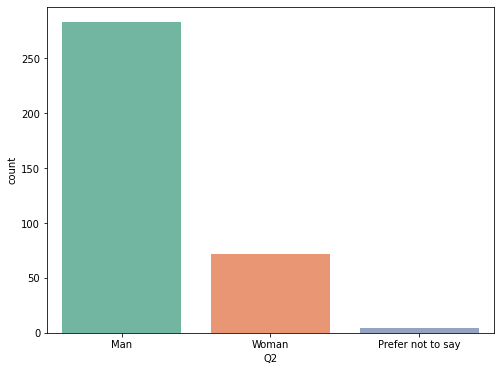

In [35]:
# 성별에 해당하는 column의 countplot을 그려보세요.
plt.figure(figsize=(8,6))
sns.countplot(data=korean, x='Q2', palette='Set2')
plt.show()

In [25]:
korean.Q2.value_counts()

Man                  283
Woman                 72
Prefer not to say      4
Name: Q2, dtype: int64

#### 최종학력에 대한 분석

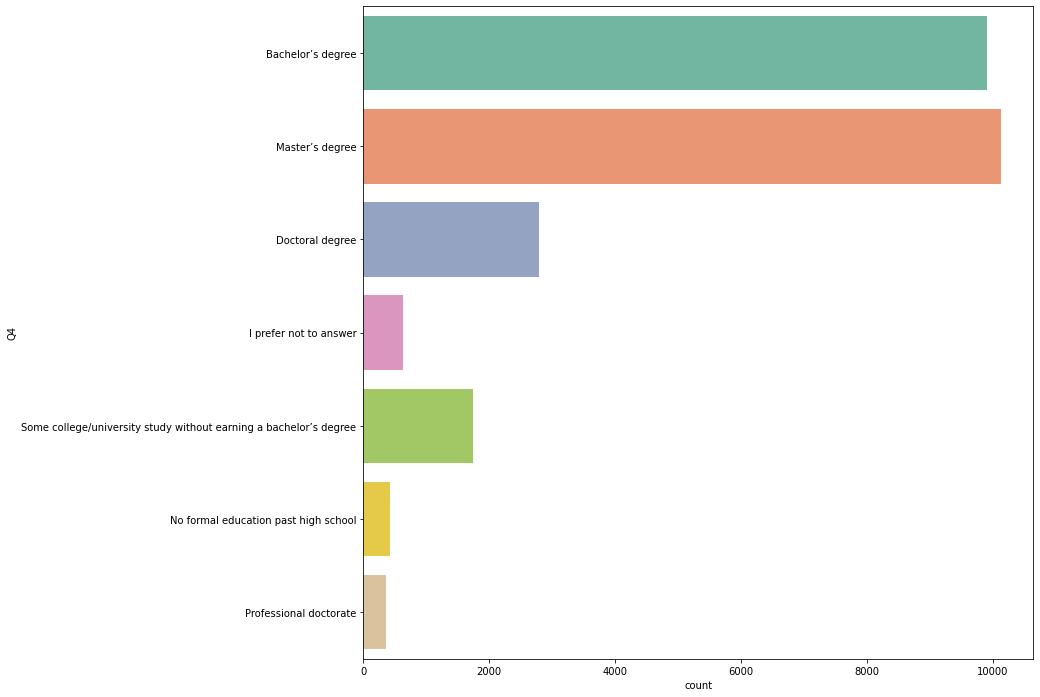

In [33]:
# 최종학력에 해당하는 column의 countplot을 그려보세요.
plt.figure(figsize=(12,12))
sns.countplot(data=survey[1:], y='Q4', palette='Set2')
plt.show()

### 4. 각 나라별 학력 통계 계산하기

- pivot table을 이용하여 나라별 통계를 계산해봅시다.

#### pivot table 만들기

In [42]:
countries = pd.pivot_table(data=survey.loc[1:, ['Q3','Q4']], index='Q3', columns='Q4', aggfunc={'Q4':'count'}, fill_value=0)
countries

Q4  \
Q4                                                 Bachelor’s degree   
Q3                                                                     
Algeria                                                            3   
Argentina                                                         47   
Australia                                                         79   
Austria                                                           10   
Bangladesh                                                       172   
Belarus                                                           19   
Belgium                                                            9   
Brazil                                                           285   
Canada                                                           104   
Chile                                                             39   
China                                                            217   
Colombia                                                          84   
Czech Republic                                                    10   
Denmark                                                            8   
Ecuador                                                           14   
Egypt                                                            292   
Ethiopia                                                          13   
France                                                            21   
Germany                                                           68   
Ghana                                                             49   
Greece                                                            19   
Hong Kong (S.A.R.)                                                26   
I do not wish to disclose my location                             17   
India                                                           4008   
Indonesia                                                        227   
Iran, Islamic Republic of...                                      47   
Iraq                                                               7   
Ireland                                                           17   
Israel                                                            36   
Italy                                                             49   
Japan                                                            241   
Kazakhstan                                                        18   
Kenya                                                            164   
Malaysia                                                          78   
Mexico                                                            89   
Morocco                                                           15   
Nepal                                                             35   
Netherlands                                                       34   
Nigeria                                                          363   
Norway                                                            10   
Other                                                            420   
Pakistan                                                         237   
Peru                                                              41   
Philippines                                                       59   
Poland                                                            43   
Portugal                                                          21   
Romania                                                           10   
Russia                                                           206   
Saudi Arabia                                                      42   
Singapore                                                         84   
South Africa                                                      63   
South Korea                                                      127   
Spain                                                             86   
Sri Lanka                         

#### 특정 국가 가져오기

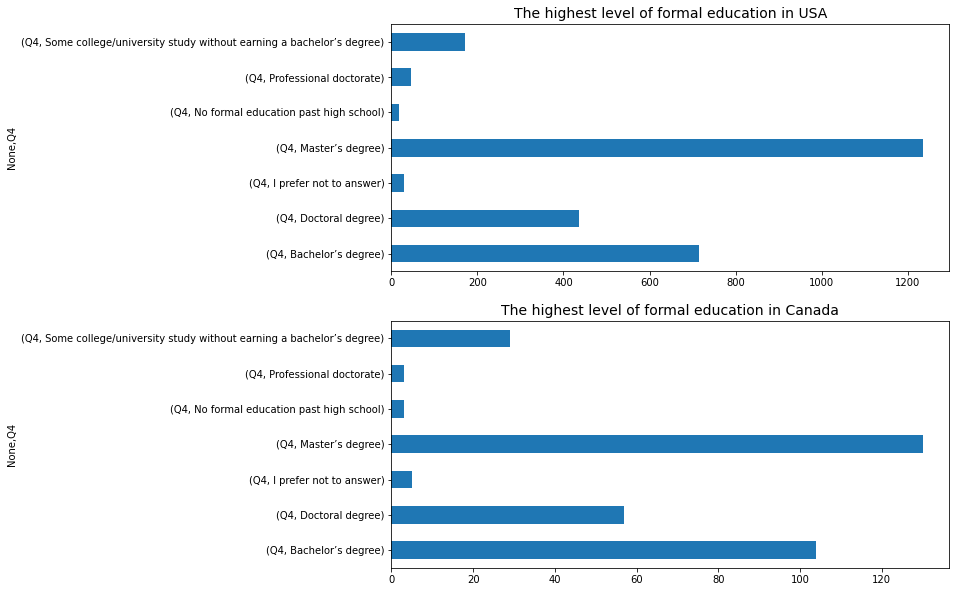

In [58]:
# 미국과 캐나다를 가져와봅시다.
usa = countries.loc['United States of America']
canada = countries.loc['Canada']
# display(usa)
# display(canada)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('The highest level of formal education in USA',fontsize=14)
usa.plot(kind= 'barh')
plt.subplot(2,1,2)
plt.title('The highest level of formal education in Canada',fontsize=14)
canada.plot(kind= 'barh')
plt.show()

### 5. 프로그래밍 언어 선호도 분석

- 어떤 column을 가져와야 할까요?

- Q7과 관련된 column들은 어떻게 다 가져올까요?

In [63]:
survey

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
25972,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 프로그래밍 언어 선호도를 포함하는 column들을 불러오기

In [77]:
Q7_columns = survey.columns[survey.columns.str.startswith('Q7')]
survey[['Q3'] + list(Q7_columns)]

,Q3,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
0,In which country do you currently reside?,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...
1,India,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Indonesia,NaN,NaN,SQL,C,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pakistan,Python,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mexico,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,Egypt,Python,NaN,SQL,NaN,NaN,NaN,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
25970,China,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,Sweden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25972,United States of America,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 언어별 정보가 합쳐진 DataFrame 만들기

In [107]:
Q7_list= []
for _, row in survey[Q7_columns][1:].iterrows():
  Q7_list.append(row[~row.isnull()].values)

Q7_list[:20]

[array(['Python', 'R'], dtype=object),
 array(['SQL', 'C', 'C++', 'Java'], dtype=object),
 array(['Python', 'C++', 'Java'], dtype=object),
 array(['Python'], dtype=object),
 array(['Python', 'C', 'MATLAB'], dtype=object),
 array(['Python'], dtype=object),
 array(['C++', 'Java', 'Javascript'], dtype=object),
 array(['Python'], dtype=object),
 array(['Python', 'SQL'], dtype=object),
 array(['Python', 'SQL'], dtype=object),
 array(['Python', 'R', 'SQL'], dtype=object),
 array(['Python', 'R', 'C++'], dtype=object),
 array(['Python', 'MATLAB'], dtype=object),
 array(['Python', 'SQL'], dtype=object),
 array(['Python'], dtype=object),
 array(['Python', 'C', 'C++', 'MATLAB'], dtype=object),
 array(['Python', 'SQL'], dtype=object),
 array(['Python', 'SQL'], dtype=object),
 array(['Python', 'SQL', 'C', 'Java', 'Javascript'], dtype=object),
 array(['None'], dtype=object)]

In [95]:
survey["PL"] = ['PL'] + Q7_list
survey.PL

0                                     PL
1                            [Python, R]
2                    [SQL, C, C++, Java]
3                    [Python, C++, Java]
4                               [Python]
                      ...               
25969    [Python, SQL, Javascript, Bash]
25970                           [Python]
25971                                 []
25972                      [Python, SQL]
25973                                 []
Name: PL, Length: 25974, dtype: object

#### 한국인 응답자의 데이터만 뽑아보세요.

In [120]:
korean = survey.loc[survey.Q3 == 'South Korea', ['Q3']+list(Q7_columns)]
korean

,Q3,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
276,South Korea,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,South Korea,Python,NaN,SQL,NaN,NaN,Java,Javascript,NaN,NaN,NaN,NaN,NaN,NaN
410,South Korea,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
482,South Korea,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,NaN,NaN,NaN,NaN
492,South Korea,Python,NaN,NaN,C,C++,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25497,South Korea,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25628,South Korea,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25842,South Korea,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25867,South Korea,NaN,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### countplot을 그리기

In [161]:
Q7_list= []
for _, row in korean[Q7_columns][1:].iterrows():
  Q7_list.append((row[~row.isnull()].values))

Q7_list

[array(['Python', 'SQL', 'Java', 'Javascript'], dtype=object),
 array(['Python'], dtype=object),
 array(['Java', 'Javascript'], dtype=object),
 array(['Python', 'C', 'C++'], dtype=object),
 array(['Python'], dtype=object),
 array(['MATLAB'], dtype=object),
 array(['Python', 'R'], dtype=object),
 array(['Python', 'R', 'Javascript'], dtype=object),
 array(['C'], dtype=object),
 array(['Python', 'R'], dtype=object),
 array(['Python', 'C', 'C++', 'Java'], dtype=object),
 array(['Python'], dtype=object),
 array(['Python'], dtype=object),
 array(['Python'], dtype=object),
 array(['Python', 'C++'], dtype=object),
 array(['Python', 'R', 'SQL', 'C', 'MATLAB'], dtype=object),
 array(['Python', 'R', 'SQL', 'MATLAB'], dtype=object),
 array(['Python', 'R'], dtype=object),
 array(['Python', 'SQL'], dtype=object),
 array(['Python'], dtype=object),
 array(['Python', 'R'], dtype=object),
 array(['SQL'], dtype=object),
 array(['Python', 'SQL', 'C', 'C++', 'Bash', 'MATLAB'], dtype=object),
 array(['None'

In [168]:
from collections import Counter

Q7_data = []
for row in Q7_list:
  Q7_data += list(row)

counter = Counter(Q7_data)
df = pd.DataFrame({'Languages':counter.keys(), "Count" : counter.values()})
df

,Languages,Count
0,Python,302
1,SQL,89
2,Java,57
3,Javascript,42
4,C,81
5,C++,68
6,MATLAB,38
7,R,89
8,Bash,14
9,None,3


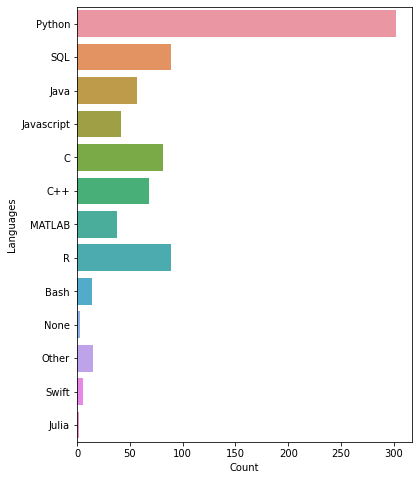

In [170]:
plt.figure(figsize=(6,8))
sns.barplot(data=df,x='Count', y='Languages')
plt.show()